In [1]:
import os
if not os.path.exists("train.csv"):
  !wget --header="Host: datahack-prod.s3.amazonaws.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://datahack.analyticsvidhya.com/contest/janatahack-machine-learning-in-agriculture/" "https://datahack-prod.s3.amazonaws.com/train_file/train_yaOffsB.csv" -c -O 'train.csv'

if not os.path.exists("test.csv"):
  !wget --header="Host: datahack-prod.s3.amazonaws.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://datahack.analyticsvidhya.com/contest/janatahack-machine-learning-in-agriculture/" "https://datahack-prod.s3.amazonaws.com/test_file/test_pFkWwen.csv" -c -O 'test.csv'

--2020-07-26 15:08:13--  https://datahack-prod.s3.amazonaws.com/train_file/train_yaOffsB.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.64.124
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.64.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2997136 (2.9M) [text/csv]
Saving to: ‘train.csv’

train.csv           100%[===================>]   2.86M  3.81MB/s    in 0.8s    

2020-07-26 15:08:14 (3.81 MB/s) - ‘train.csv’ saved [2997136/2997136]

--2020-07-26 15:08:16--  https://datahack-prod.s3.amazonaws.com/test_file/test_pFkWwen.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.66.116
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.66.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1881912 (1.8M) [text/csv]
Saving to: ‘test.csv’

test.csv            100%[===================>]   1.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
# ID	: UniqueID
# Estimated_Insects_Count	: Estimated insects count per square meter
# Crop_Type :	Category of Crop(0,1)
# Soil_Type	: Category of Soil (0,1)
# Pesticide_Use_Category : Type of pesticides uses (1- Never, 2-Previously Used, 3-Currently Using)
# Number_Doses_Week :	Number of doses per week
# Number_Weeks_Used	: Number of weeks used
# Number_Weeks_Quit	: Number of weeks quit
# Season :	Season Category (1,2,3)
# Crop_Damage	: Crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides)

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
merge = pd.concat([train,test]).reset_index(drop=True)
print(merge.shape)

# test['Estimated_Insects_Count_per_km_sq'] = test['Estimated_Insects_Count'].apply(lambda x:x*0.000001) 
# train['Estimated_Insects_Count_per_km_sq'] = train['Estimated_Insects_Count'].apply(lambda x:x*0.000001) 

from sklearn.linear_model import LinearRegression,LogisticRegression
from lightgbm import LGBMRegressor,LGBMClassifier
from xgboost import XGBRegressor,XGBClassifier
from sklearn.model_selection import train_test_split

# imputer = LGBMRegressor()
# use_train = merge[~merge.Number_Weeks_Used.isna()]
# X = use_train.drop(['ID','Number_Weeks_Used','Crop_Damage'],axis=1)
# Y = use_train[['Number_Weeks_Used']]
# impute_train_x,impute_test_x,impute_train_y,impute_test_y = train_test_split(X,Y,test_size=0.2,shuffle=True)
# imputer.fit(impute_train_x,impute_train_y)
# print(imputer.score(impute_test_x,impute_test_y))

# imputer.fit(X,Y)

# na_train = merge[merge.Number_Weeks_Used.isna()]
# output = imputer.predict(na_train.drop(['ID','Number_Weeks_Used','Crop_Damage'],axis=1))
# na_train['Number_Weeks_Used'] = output
# # print(na_train.shape,use_train.shape)

# merge = pd.concat([use_train,na_train]).reset_index(drop=True)
# # print(merge.shape)
merge.Number_Weeks_Used = merge.Number_Weeks_Used.fillna(merge.Number_Weeks_Used.dropna().values.mean())
# merge['Number_Weeks_Used'] = merge['Number_Weeks_Used'].apply(lambda x:int(x))
# merge['Number_Weeks_Quit'] = merge['Number_Weeks_Quit'].apply(lambda x:int(x))
# merge['total_doses_taken'] = merge.apply(lambda x:x['Number_Doses_Week']*x['Number_Weeks_Used'],axis=1)
# merge['num_farming_weeks'] = merge.apply(lambda x:x['Number_Weeks_Used']+x['Number_Weeks_Quit'],axis=1)

# m = merge.groupby(['Crop_Type',"Soil_Type","Pesticide_Use_Category","Season"])['Number_Doses_Week',"Number_Weeks_Used","Number_Weeks_Quit","total_doses_taken","num_farming_weeks"]
# m = m.agg(['mean',"max","min"]).reset_index()
# columns = []
# for i in m.columns:
#   if len(i) >1 and i[1] != "":
#     columns.append("_".join(i))
#   else:
#     columns.append(i[0])
# m.columns = columns
# merge = merge.merge(m,on=['Crop_Type',"Soil_Type","Pesticide_Use_Category","Season"],how="left")

num_cols= ['Estimated_Insects_Count','Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit','total_doses_taken','num_farming_weeks']

train = merge[~merge.Crop_Damage.isna()]
test = merge[merge.Crop_Damage.isna()]
test.drop(['Crop_Damage'],axis=1,inplace=True)


train

(148168, 10)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0.0
1,F00000003,209,1,0,1,0,0.0,0,2,1.0
2,F00000004,257,1,0,1,0,0.0,0,2,1.0
3,F00000005,257,1,1,1,0,0.0,0,2,1.0
4,F00000006,342,1,0,1,0,0.0,0,2,1.0
...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337,1,0,2,10,12.0,44,3,0.0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0.0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0.0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0.0


In [ ]:
# m = merge.groupby(['Crop_Type',"Soil_Type","Pesticide_Use_Category","Season"])['Number_Doses_Week',"Number_Weeks_Used","Number_Weeks_Quit","total_doses_taken","num_farming_weeks"]
# m = m.agg(['mean',"max","min"]).reset_index()
# columns = []
# for i in m.columns:
#   if len(i) >1 and i[1] != "":
#     columns.append("_".join(i))
#   else:
#     columns.append(i[0])
# m.columns = columns
# m

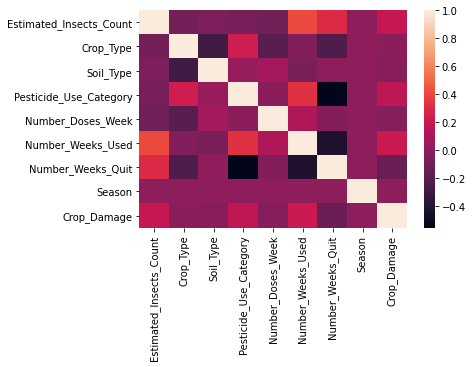

In [6]:
sns.heatmap(train.corr())

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        88858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  float64
dtypes: float64(2), int64(7), object(1)
memory usage: 7.5+ MB


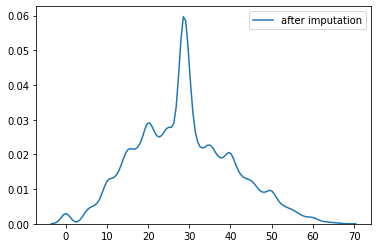

In [9]:
# sns.distplot(train.Estimated_Insects_Count)
# sns.kdeplot(na_train.Number_Weeks_Used,label="imputed")
# sns.kdeplot(use_train.Number_Weeks_Used,label="before imputation")
sns.kdeplot(merge.Number_Weeks_Used,label="after imputation")

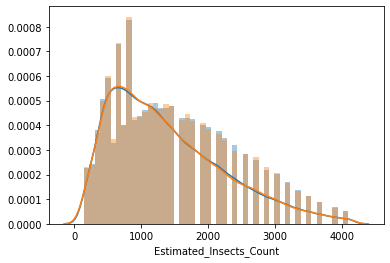

In [10]:
sns.distplot(train.Estimated_Insects_Count,label="train",)
sns.distplot(test.Estimated_Insects_Count,label="test")

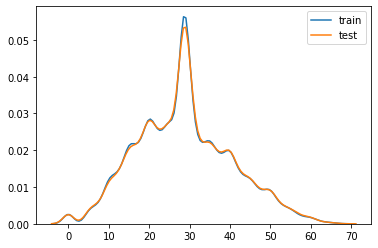

In [11]:
sns.kdeplot(train.Number_Weeks_Used,label="train")
sns.kdeplot(test.Number_Weeks_Used,label="test")

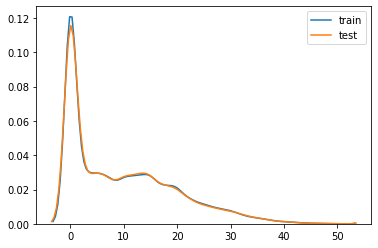

In [12]:
sns.kdeplot(train.Number_Weeks_Quit,label="train")
sns.kdeplot(test.Number_Weeks_Quit,label="test")

In [14]:
# sns.jointplot(x="Number_Weeks_Used",y="Crop_Type",data=train,kind="kde")
# sns.distplot(train["num_farming_weeks"])

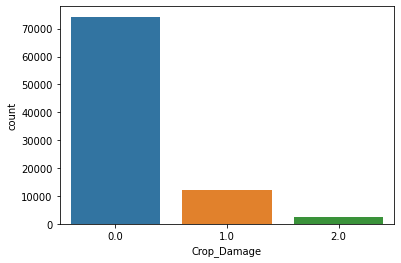

In [15]:
sns.countplot(train.Crop_Damage)

In [16]:
!pip install catboost

     |████████████████████████████████| 64.8MB 64kB/s 


In [17]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split , KFold
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB ,CategoricalNB
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , AdaBoostClassifier

In [18]:
from sklearn.utils import class_weight
y = train[['Crop_Damage']].values.reshape((-1))
class_weights = class_weight.compute_class_weight('balanced',np.unique(y),y)
class_weights

array([ 0.39897806,  2.40670621, 12.80559158])

In [19]:
import warnings 
warnings.filterwarnings("ignore")

# X = train.drop(['ID','Crop_Damage'],axis=1)
# Y = train[['Crop_Damage']]

X = train.drop(['ID',"Crop_Damage"],axis=1)
Y = train[['Crop_Damage']]

params={
    "od_type":"Iter",
    "od_wait":50,
    "learning_rate":0.15,
    "eval_metric":"Accuracy",
    "verbose":50,
    "boosting_type":"Plain",
    # "class_weights":class_weights
}

from sklearn.utils import class_weight
from sklearn.model_selection import KFold, StratifiedKFold

y = train[['Crop_Damage']].values.reshape((-1))
class_weights = class_weight.compute_class_weight('balanced',np.unique(y),y)
class_weights

n_folds=[4]
for n_fold in n_folds:
  print("\nPerforming on N_folds :",n_fold)
  folds = StratifiedKFold(n_splits=n_fold,shuffle=True)
  scores=[]
  max_score = 0

  for (train_idx,test_idx),i in list(zip(folds.split(X,Y),range(n_fold))):
    test_set = (X.iloc[test_idx],Y.iloc[test_idx])
    model = CatBoostClassifier(**params)
    model.fit(X.iloc[train_idx],Y.iloc[train_idx],
              cat_features=["Crop_Type",'Soil_Type','Pesticide_Use_Category','Season'],
              eval_set=test_set)
    
    # model= XGBClassifier(verbose=False)
    # model.fit(X.iloc[train_idx],Y.iloc[train_idx],eval_set=[test_set],
    #           early_stopping_rounds=25,verbose=False)
    score = model.score(*test_set)
    scores.append(score)
    if score > max_score:
      max_score=score
      best_idx=train_idx
      val_idx = test_idx
    print("Model Score at fold %d : " % i,score)

  print("mean_score",np.array(scores).mean())
  print("_----_"*25)
# model.fit(X,Y,
#           cat_features=["Crop_Type",'Soil_Type','Pesticide_Use_Category','Season'])


Performing on N_folds : 4
0:	learn: 0.8402083	test: 0.8409633	best: 0.8409633 (0)	total: 194ms	remaining: 3m 14s
50:	learn: 0.8440196	test: 0.8453297	best: 0.8453297 (48)	total: 6.26s	remaining: 1m 56s
100:	learn: 0.8471257	test: 0.8463201	best: 0.8465001 (85)	total: 12.4s	remaining: 1m 50s
150:	learn: 0.8487463	test: 0.8465001	best: 0.8468602 (121)	total: 18.7s	remaining: 1m 45s
200:	learn: 0.8502618	test: 0.8465451	best: 0.8469052 (157)	total: 25.1s	remaining: 1m 39s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8469052442
bestIteration = 157

Shrink model to first 158 iterations.
Model Score at fold 0 :  0.8469052442043664
0:	learn: 0.8402083	test: 0.8409633	best: 0.8409633 (0)	total: 146ms	remaining: 2m 25s
50:	learn: 0.8440046	test: 0.8443394	best: 0.8445195 (44)	total: 6s	remaining: 1m 51s
100:	learn: 0.8467056	test: 0.8460050	best: 0.8460950 (87)	total: 11.8s	remaining: 1m 45s
150:	learn: 0.8485963	test: 0.8470853	best: 0.8471303 (141)	total: 18.2s	remaini

In [25]:
from sklearn.metrics import accuracy_score

params={
    "od_type":"Iter",
    "od_wait":50,
    'iterations':800,
    "eval_metric":"Accuracy",
    "verbose":50,
    "boosting_type":"Plain",
    "class_weights":class_weights
}

from sklearn.metrics import classification_report
# predictions = model.predict(test_set[0])
# print(classification_report(test_set[1],predictions))
folded_models = []
n_folds=[]
for n_fold in n_folds:
  print("\nPerforming on N_folds :",n_fold)
  folds = StratifiedKFold(n_splits=n_fold,shuffle=True)
  scores=[]
  max_score = 0

  for (train_idx,test_idx),i in list(zip(folds.split(X,Y),range(n_fold))):
    test_set = (X.iloc[test_idx],Y.iloc[test_idx])
    model = CatBoostClassifier(**params)
    model.fit(X.iloc[train_idx],Y.iloc[train_idx],
              cat_features=["Crop_Type",'Soil_Type','Pesticide_Use_Category','Season'],
              eval_set=test_set)
    
    folded_models.append(model)
    # model= LGBMClassifier(eval_metric="accuracy")
    # model.fit(X.iloc[train_idx],Y.iloc[train_idx],
    #           categorical_feature=["Crop_Type",'Soil_Type','Pesticide_Use_Category','Season'],
    #           eval_set=[test_set],verbose=False)
    # model= XGBClassifier(verbose=False)
    # model.fit(X.iloc[train_idx],Y.iloc[train_idx],eval_set=[test_set],
    #           early_stopping_rounds=25,verbose=False)

    score = accuracy_score(test_set[1],model.predict(test_set[0]))
    scores.append(score)
    if score > max_score:
      max_score=score
      best_idx=train_idx
      val_idx = test_idx
    print("Model Score at fold %d : " % i,score)
    print(classification_report(test_set[1],model.predict(test_set[0])))
    print("_--_"*20)

  print("mean_score",np.array(scores).mean())


test_set = (X.iloc[val_idx],Y.iloc[val_idx])
model= CatBoostClassifier(**params)
model.fit(X.iloc[best_idx],Y.iloc[best_idx],
          cat_features=["Crop_Type",'Soil_Type','Pesticide_Use_Category','Season'],
          eval_set=test_set)

# model= LGBMClassifier()
# model.fit(X.iloc[best_idx],Y.iloc[best_idx],
#           categorical_feature=["Crop_Type",'Soil_Type','Pesticide_Use_Category','Season']
#           )    
# model= XGBClassifier(verbose=False)
# model.fit(X.iloc[best_idx],Y.iloc[best_idx],eval_set=[test_set],
#           early_stopping_rounds=25,verbose=False)

score = accuracy_score(test_set[1],model.predict(test_set[0]))
score
print(classification_report(test_set[1],model.predict(test_set[0])))


Performing on N_folds : 4
Learning rate set to 0.117436
0:	learn: 0.5372440	test: 0.5308088	best: 0.5308088 (0)	total: 146ms	remaining: 2m 26s
50:	learn: 0.5698106	test: 0.5581436	best: 0.5607132 (25)	total: 6.1s	remaining: 1m 53s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5607132357
bestIteration = 25

Shrink model to first 26 iterations.
Model Score at fold 0 :  0.6501462975467027
              precision    recall  f1-score   support

         0.0       0.93      0.70      0.80     18560
         1.0       0.24      0.34      0.28      3077
         2.0       0.09      0.64      0.16       578

    accuracy                           0.65     22215
   macro avg       0.42      0.56      0.42     22215
weighted avg       0.82      0.65      0.71     22215

_--__--__--__--__--__--__--__--__--__--__--__--__--__--__--__--__--__--__--__--_
Learning rate set to 0.117436
0:	learn: 0.5369092	test: 0.5327998	best: 0.5327998 (0)	total: 157ms	remaining: 2m 36s
50:	learn

In [54]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.23,random_state=1890)

def train(depth, l2_leaf_reg,random_strength,bagging_temperature,
          learning_rate,one_hot_max_size,border_count):
  params={
      "od_type":"Iter",
      "od_wait":50,
      'learning_rate':learning_rate,
      "one_hot_max_size":int(one_hot_max_size),
      "l2_leaf_reg":int(l2_leaf_reg),
      "bagging_temperature":bagging_temperature,
      "random_strength":random_strength,
      "border_count":int(border_count),
      "eval_metric":"Accuracy",
      "verbose":False,
      # "boosting_type":"Plain",
      "depth":int(depth),
      "class_weights":class_weights
  }

  test_set = (x_test,y_test)
  model= CatBoostClassifier(**params)
  model.fit(x_train,y_train,
            cat_features=["Crop_Type",'Soil_Type','Pesticide_Use_Category','Season'],
            eval_set=test_set,verbose=False)

  score = accuracy_score(test_set[1],model.predict(test_set[0]))
  score
  # print(classification_report(test_set[1],model.predict(test_set[0])))
  return score

In [55]:
!pip install bayesian-optimization

In [61]:
from bayes_opt import BayesianOptimization
bounds = {
    "learning_rate":(0.02,0.15),
    "depth":(2,10),
    "random_strength":(1,100),
    "l2_leaf_reg":(5,20),
    "bagging_temperature":(0.6,1),
    "one_hot_max_size":(2,4),
    "border_count":(15,150)
}

optimizer = BayesianOptimization(
    f = train,
    pbounds=bounds
    
)

optimizer.maximize(n_iter=5,init_points=5)

|   iter    |  target   | baggin... | border... |   depth   | l2_lea... | learni... | one_ho... | random... |
-------------------------------------------------------------------------------------------------------------
|  1        |  0.6492   |  0.9253   |  112.7    |  5.051    |  13.12    |  0.07219  |  2.949    |  39.85    |
|  2        |  0.6414   |  0.6428   |  22.41    |  4.872    |  15.45    |  0.1266   |  2.026    |  47.66    |
|  3        |  0.5947   |  0.6823   |  42.97    |  5.645    |  9.268    |  0.03316  |  3.557    |  46.47    |
|  4        |  0.662    |  0.8084   |  47.28    |  2.564    |  5.274    |  0.06866  |  2.346    |  25.19    |
|  5        |  0.6435   |  0.9537   |  119.4    |  5.157    |  7.762    |  0.1341   |  2.351    |  16.94    |
|  6        |  0.6433   |  0.6499   |  47.84    |  3.228    |  8.79     |  0.115    |  2.312    |  25.42    |
|  7        |  0.6267   |  0.7822   |  148.4    |  2.591    |  5.523    |  0.1198   |  2.917    |  99.39    |
|  8      

In [65]:
params={
    "od_type":"Iter",
    "od_wait":50,
    'learning_rate':optimizer.max['params']['learning_rate'],
    "one_hot_max_size":int(optimizer.max['params']['one_hot_max_size']),
    "l2_leaf_reg":int(optimizer.max['params']['l2_leaf_reg']),
    "bagging_temperature":optimizer.max['params']['bagging_temperature'],
    "random_strength":optimizer.max['params']['random_strength'],
    "border_count":int(optimizer.max['params']['border_count']),
    "eval_metric":"Accuracy",
    "verbose":50,
    "boosting_type":"Plain",
    "depth":int(optimizer.max['params']['depth']),
    "class_weights":class_weights
}


test_set = (x_test,y_test)
model= CatBoostClassifier(**params)
model.fit(x_train,y_train,
          cat_features=["Crop_Type",'Soil_Type','Pesticide_Use_Category','Season'],
          eval_set=test_set)

score = accuracy_score(test_set[1],model.predict(test_set[0]))
print("Accuracy Score : ",score)
print(classification_report(test_set[1],model.predict(test_set[0])))

0:	learn: 0.3978981	test: 0.3895279	best: 0.3895279 (0)	total: 68.6ms	remaining: 1m 8s
50:	learn: 0.5139268	test: 0.5194324	best: 0.5314024 (17)	total: 3.3s	remaining: 1m 1s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.53140235
bestIteration = 17

Shrink model to first 18 iterations.
Accuracy Score :  0.6620021528525296
              precision    recall  f1-score   support

         0.0       0.92      0.74      0.82     17195
         1.0       0.22      0.15      0.18      2747
         2.0       0.08      0.70      0.14       496

    accuracy                           0.66     20438
   macro avg       0.40      0.53      0.38     20438
weighted avg       0.80      0.66      0.72     20438



In [66]:
pd.DataFrame(list(zip(X.columns,model.feature_importances_)),columns=['Feature','Importance']).sort_values("Importance",ascending=False)

,Feature,Importance
5,Number_Weeks_Used,36.065093
3,Pesticide_Use_Category,32.356979
0,Estimated_Insects_Count,17.116590
6,Number_Weeks_Quit,12.697259
1,Crop_Type,1.746272
2,Soil_Type,0.015873
7,Season,0.001932
4,Number_Doses_Week,0.000000


In [68]:
if not "Crop_Damage" in test.columns:
  predictions = model.predict(test.drop(['ID'],axis=1))
else:
  predictions = model.predict(test.drop(['ID','Crop_Damage'],axis=1))
test['Crop_Damage'] = predictions
submission = test[['ID','Crop_Damage']]
print(np.unique(submission.Crop_Damage,return_counts=True))
submission.to_csv("catboost_tuned_weighted_v3.csv",index=False)
submission

(array([0., 1., 2.]), array([40354,  5382, 13574]))


,ID,Crop_Damage
88858,F00000002,2.0
88859,F00000007,2.0
88860,F00000011,2.0
88861,F00000013,2.0
88862,F00000014,2.0
...,...,...
148163,F00155937,0.0
148164,F00155940,0.0
148165,F00155941,0.0
148166,F00155943,0.0
